### **AI for HumanForYou**

**RAW DATASET DESCRIPTION**

In [1]:
import pandas as pd
general_data = pd.read_csv('Dataset/general_data.csv')

# Display the first lines of the dataset
general_data.head()


Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [2]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [3]:
print(general_data['Over18'].value_counts())
print(general_data['EmployeeCount'].value_counts())
print(general_data['StandardHours'].value_counts())

Over18
Y    4410
Name: count, dtype: int64
EmployeeCount
1    4410
Name: count, dtype: int64
StandardHours
8    4410
Name: count, dtype: int64


These three variables always have the same value, so you can delete them as they will have no impact.

In [4]:
general_data.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

In [5]:
general_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Handling missing data :

In [6]:
numerical_columns = general_data.select_dtypes(include=['float64','int64']).columns
general_data[numerical_columns] = general_data[numerical_columns].fillna(general_data[numerical_columns].median())

categorical_columns = general_data.select_dtypes(include=['object']).columns
general_data[categorical_columns] = general_data[categorical_columns].fillna(general_data[categorical_columns].mode().iloc[0])

general_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Manager survey

In [7]:
manager_survey_data = pd.read_csv('Dataset/manager_survey_data.csv')
manager_survey_data.head()

EmployeeID  JobInvolvement  PerformanceRating
0           1               3                  3
1           2               2                  4
2           3               3                  3
3           4               2                  3
4           5               3                  3

In [8]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [9]:
all_data = pd.merge(general_data, manager_survey_data, on='EmployeeID', how='inner')
print(all_data.shape)
all_data.head()

(4410, 23)


Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeID  Gender  JobLevel  ...  \
0          2  Life Sciences           1  Female         1  ...   
1          1  Life Sciences           2  Female         1  ...   
2          4          Other           3    Male         4  ...   
3          5  Life Sciences           4    Male         3  ...   
4          1        Medical           5    Male         1  ...   

  NumCompaniesWorked PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                1.0                11                 0                1.0   
1                0.0                23                 1                6.0   
2                1.0                15                 3                5.0   
3                3.0                11                 3               13.0   
4                4.0                12                 2                9.0   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  JobInvolvement  PerformanceRating  
0                     0               3                  3  
1                     4               2                  4  
2                     3               3                  3  
3                     5               2                  3  
4                     4               3                  3  

[5 rows x 23 columns]

# Employee survey

In [10]:
employee_survey_data = pd.read_csv('Dataset/employee_survey_data.csv')
employee_survey_data.head()

EmployeeID  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance
0           1                      3.0              4.0              2.0
1           2                      3.0              2.0              4.0
2           3                      2.0              2.0              1.0
3           4                      4.0              4.0              3.0
4           5                      4.0              1.0              3.0

In [11]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [12]:
employee_survey_data.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [13]:
employee_survey_data = employee_survey_data.fillna(employee_survey_data.mode().iloc[0])
print(employee_survey_data.isnull().sum())

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


In [14]:
all_data = pd.merge(all_data, employee_survey_data, on='EmployeeID', how='inner')
print(all_data.shape)
all_data.head()

(4410, 26)


Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeID  Gender  JobLevel  ...  \
0          2  Life Sciences           1  Female         1  ...   
1          1  Life Sciences           2  Female         1  ...   
2          4          Other           3    Male         4  ...   
3          5  Life Sciences           4    Male         3  ...   
4          1        Medical           5    Male         1  ...   

  TotalWorkingYears TrainingTimesLastYear  YearsAtCompany  \
0               1.0                     6               1   
1               6.0                     3               5   
2               5.0                     2               5   
3              13.0                     5               8   
4               9.0                     2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
0                        0                     0               3   
1                        1                     4               2   
2                        0                     3               3   
3                        7                     5               2   
4                        0                     4               3   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  3                      3.0              4.0   
1                  4                      3.0              2.0   
2                  3                      2.0              2.0   
3                  3                      4.0              4.0   
4                  3                      4.0              1.0   

   WorkLifeBalance  
0              2.0  
1              4.0  
2              1.0  
3              3.0  
4              3.0  

[5 rows x 26 columns]

# Badge reader

In [ ]:
in_time = pd.read_csv('Dataset/in_time.csv')

# Rename first column
in_time.rename(columns={in_time.columns[0]: 'EmployeeID'}, inplace=True)

# Conversion 
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

in_time.head()

In [ ]:
out_time = pd.read_csv('Dataset/out_time.csv')

# Rename first column
out_time.rename(columns={out_time.columns[0]: 'EmployeeID'}, inplace=True)

# Conversion
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

out_time.head()

For ethical concerns, the data from the badge readers cannot be used as it stands. We decided to process this data in order to add the "number of hours worked per day" column to our final table

Counting days worked in the year (Number of non ‘NA’ values)

In [17]:
days_worked = in_time.iloc[:, 1:].notna().sum(axis=1)
print(days_worked.head())

0    232
1    236
2    242
3    235
4    245
dtype: int64


Counting the number of hours worked per day for each employee

In [18]:
hours_worked = out_time.iloc[:, 1:] - in_time.iloc[:, 1:]
hours_worked = hours_worked.map(lambda x: x.total_seconds() / 3600 if pd.notnull(x) else 0)

hours_per_day = hours_worked.sum(axis=1) / days_worked
print(hours_per_day.head())

0    7.373651
1    7.718969
2    7.013240
3    7.193678
4    8.006175
dtype: float64


In [19]:
badge_data = pd.DataFrame({
    'EmployeeID': in_time['EmployeeID'],
    'HoursPerDay': hours_per_day
})

print(badge_data.head())

   EmployeeID  HoursPerDay
0           1     7.373651
1           2     7.718969
2           3     7.013240
3           4     7.193678
4           5     8.006175


In [20]:
all_data = pd.merge(all_data, badge_data, on='EmployeeID', how='inner')
print(all_data.shape)
all_data.head()

(4410, 27)


Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeID  Gender  JobLevel  ...  \
0          2  Life Sciences           1  Female         1  ...   
1          1  Life Sciences           2  Female         1  ...   
2          4          Other           3    Male         4  ...   
3          5  Life Sciences           4    Male         3  ...   
4          1        Medical           5    Male         1  ...   

  TrainingTimesLastYear YearsAtCompany  YearsSinceLastPromotion  \
0                     6              1                        0   
1                     3              5                        1   
2                     2              5                        0   
3                     5              8                        7   
4                     2              6                        0   

   YearsWithCurrManager  JobInvolvement  PerformanceRating  \
0                     0               3                  3   
1                     4               2                  4   
2                     3               3                  3   
3                     5               2                  3   
4                     4               3                  3   

   EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  HoursPerDay  
0                      3.0              4.0              2.0     7.373651  
1                      3.0              2.0              4.0     7.718969  
2                      2.0              2.0              1.0     7.013240  
3                      4.0              4.0              3.0     7.193678  
4                      4.0              1.0              3.0     8.006175  

[5 rows x 27 columns]

Delete EmployeeId column for ethical concerns

In [21]:
all_data.drop(['EmployeeID'], axis=1, inplace=True)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

# Data Exploration and Visualization

In [22]:
# Core data libraries
import pandas as pd  # dataframes and csv I/O
import numpy as np  # numerical utilities

# Plotting libraries
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # statistical plotting built on matplotlib
import os  # path helpers

# Scikit-learn utilities used later for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Scikit-learn for 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, classification_report, roc_auc_score, roc_curve,  precision_recall_curve
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
# from xgboost import XGBClassifier
    
# Configuring display settings
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:.2f}'.format)

In [23]:
all_data.describe()

Age  DistanceFromHome  Education  JobLevel  MonthlyIncome  \
count 4410.00           4410.00    4410.00   4410.00        4410.00   
mean    36.92              9.19       2.91      2.06       65029.31   
std      9.13              8.11       1.02      1.11       47068.89   
min     18.00              1.00       1.00      1.00       10090.00   
25%     30.00              2.00       2.00      1.00       29110.00   
50%     36.00              7.00       3.00      2.00       49190.00   
75%     43.00             14.00       4.00      3.00       83800.00   
max     60.00             29.00       5.00      5.00      199990.00   

       NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  \
count             4410.00            4410.00           4410.00   
mean                 2.69              15.21              0.79   
std                  2.49               3.66              0.85   
min                  0.00              11.00              0.00   
25%                  1.00              12.00              0.00   
50%                  2.00              14.00              1.00   
75%                  4.00              18.00              1.00   
max                  9.00              25.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count            4410.00                4410.00         4410.00   
mean               11.28                   2.80            7.01   
std                 7.77                   1.29            6.13   
min                 0.00                   0.00            0.00   
25%                 6.00                   2.00            3.00   
50%                10.00                   3.00            5.00   
75%                15.00                   3.00            9.00   
max                40.00                   6.00           40.00   

       YearsSinceLastPromotion  YearsWithCurrManager  JobInvolvement  \
count                  4410.00               4410.00         4410.00   
mean                      2.19                  4.12            2.73   
std                       3.22                  3.57            0.71   
min                       0.00                  0.00            1.00   
25%                       0.00                  2.00            2.00   
50%                       1.00                  3.00            3.00   
75%                       3.00                  7.00            3.00   
max                      15.00                 17.00            4.00   

       PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
count            4410.00                  4410.00          4410.00   
mean                3.15                     2.73             2.73   
std                 0.36                     1.09             1.10   
min                 3.00                     1.00             1.00   
25%                 3.00                     2.00             2.00   
50%                 3.00                     3.00             3.00   
75%                 3.00                     4.00             4.00   
max                 4.00                     4.00             4.00   

       WorkLifeBalance  HoursPerDay  
count          4410.00      4410.00  
mean              2.76         7.70  
std               0.70         1.34  
min               1.00         5.95  
25%               2.00         6.67  
50%               3.00         7.41  
75%               3.00         8.37  
max               4.00        11.03

### Visualizing Variables
We'll start by visualizing the distributions of numerical variables to better understand their behavior.

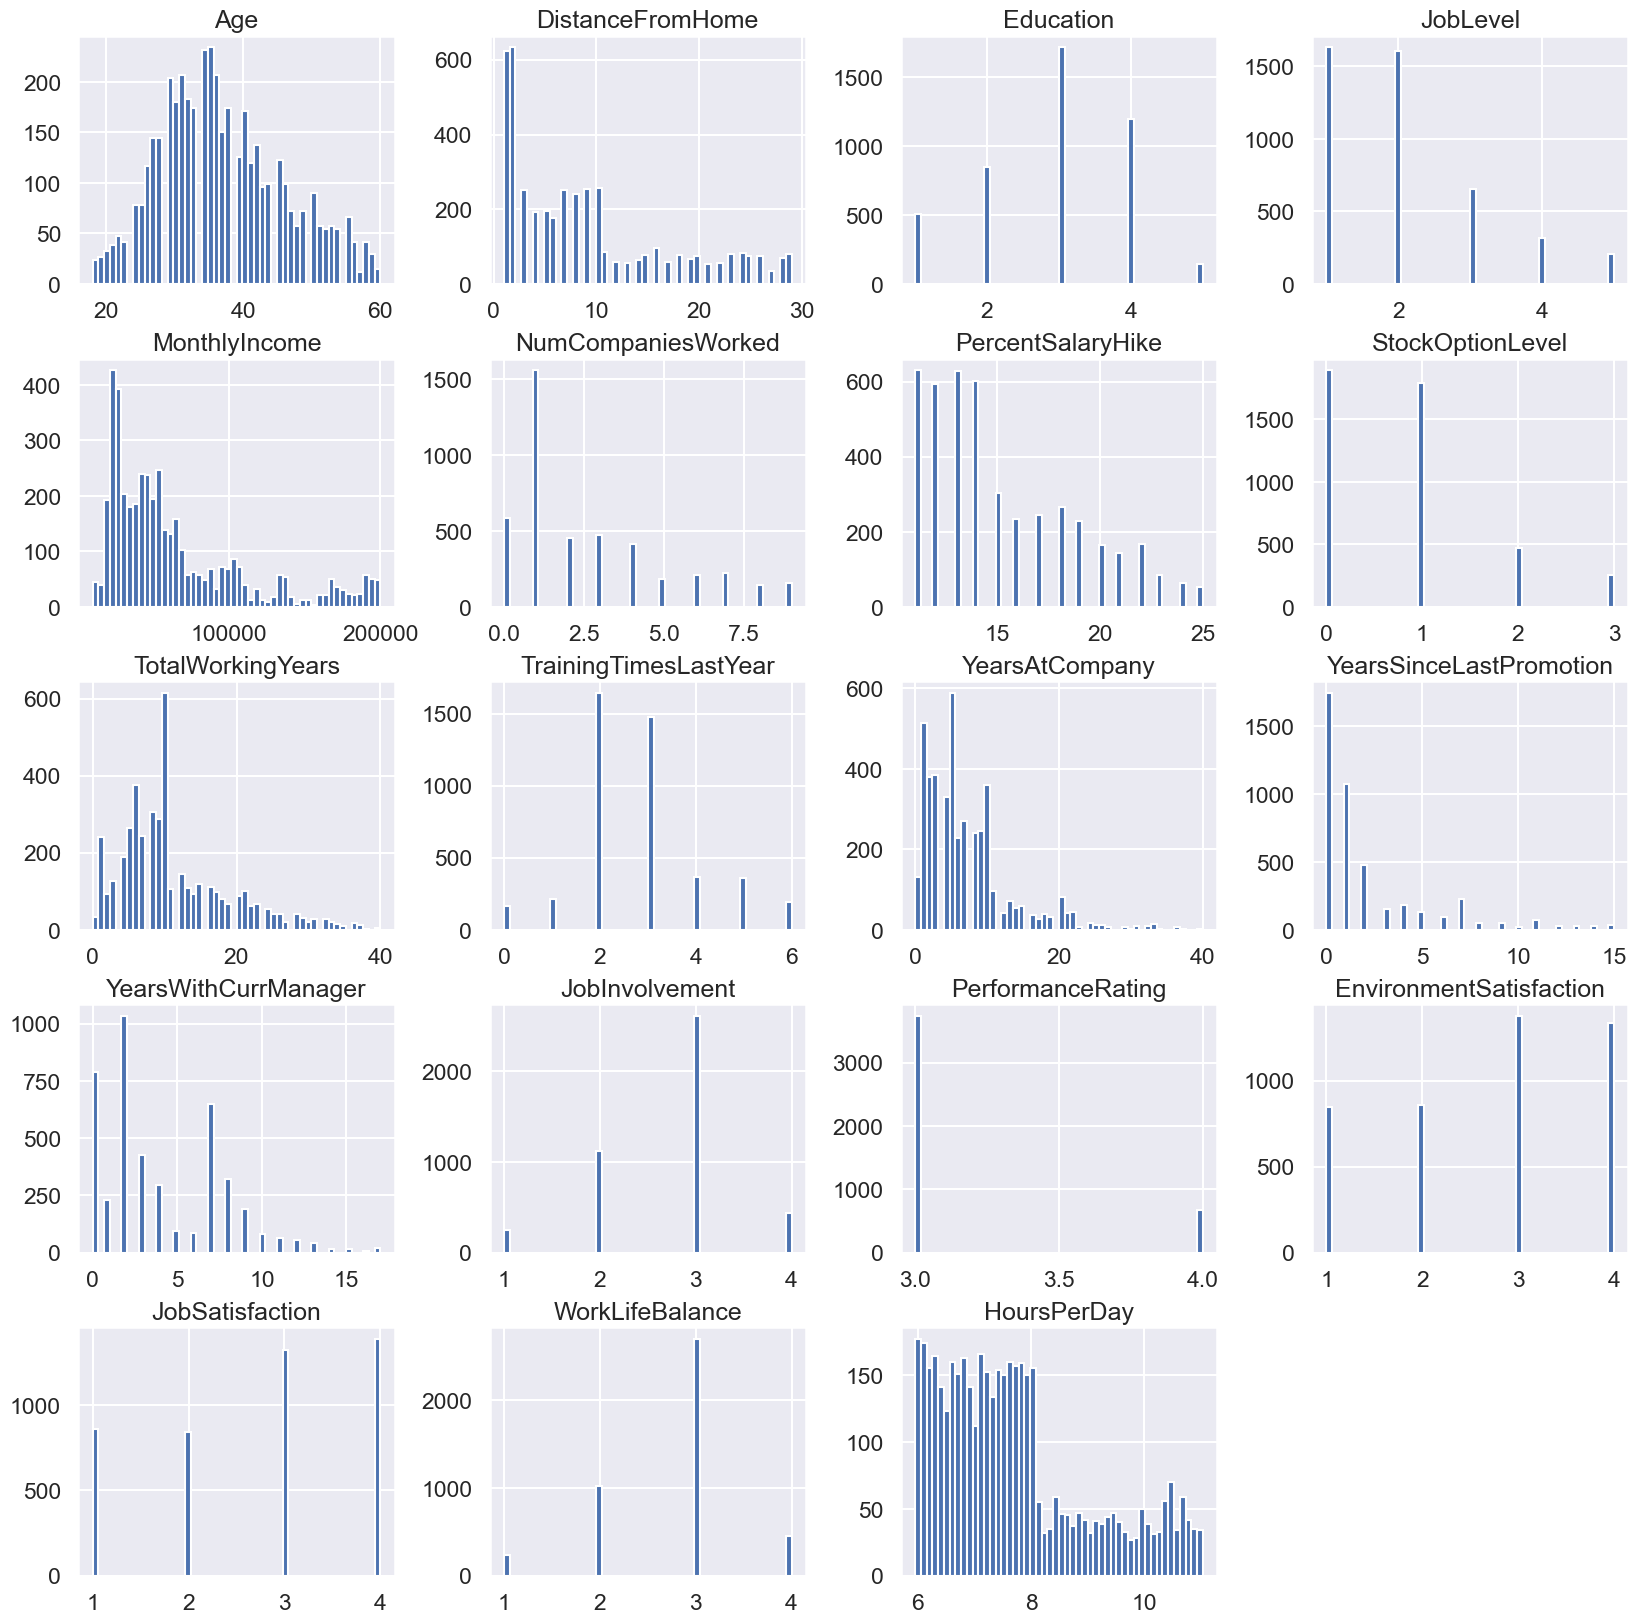

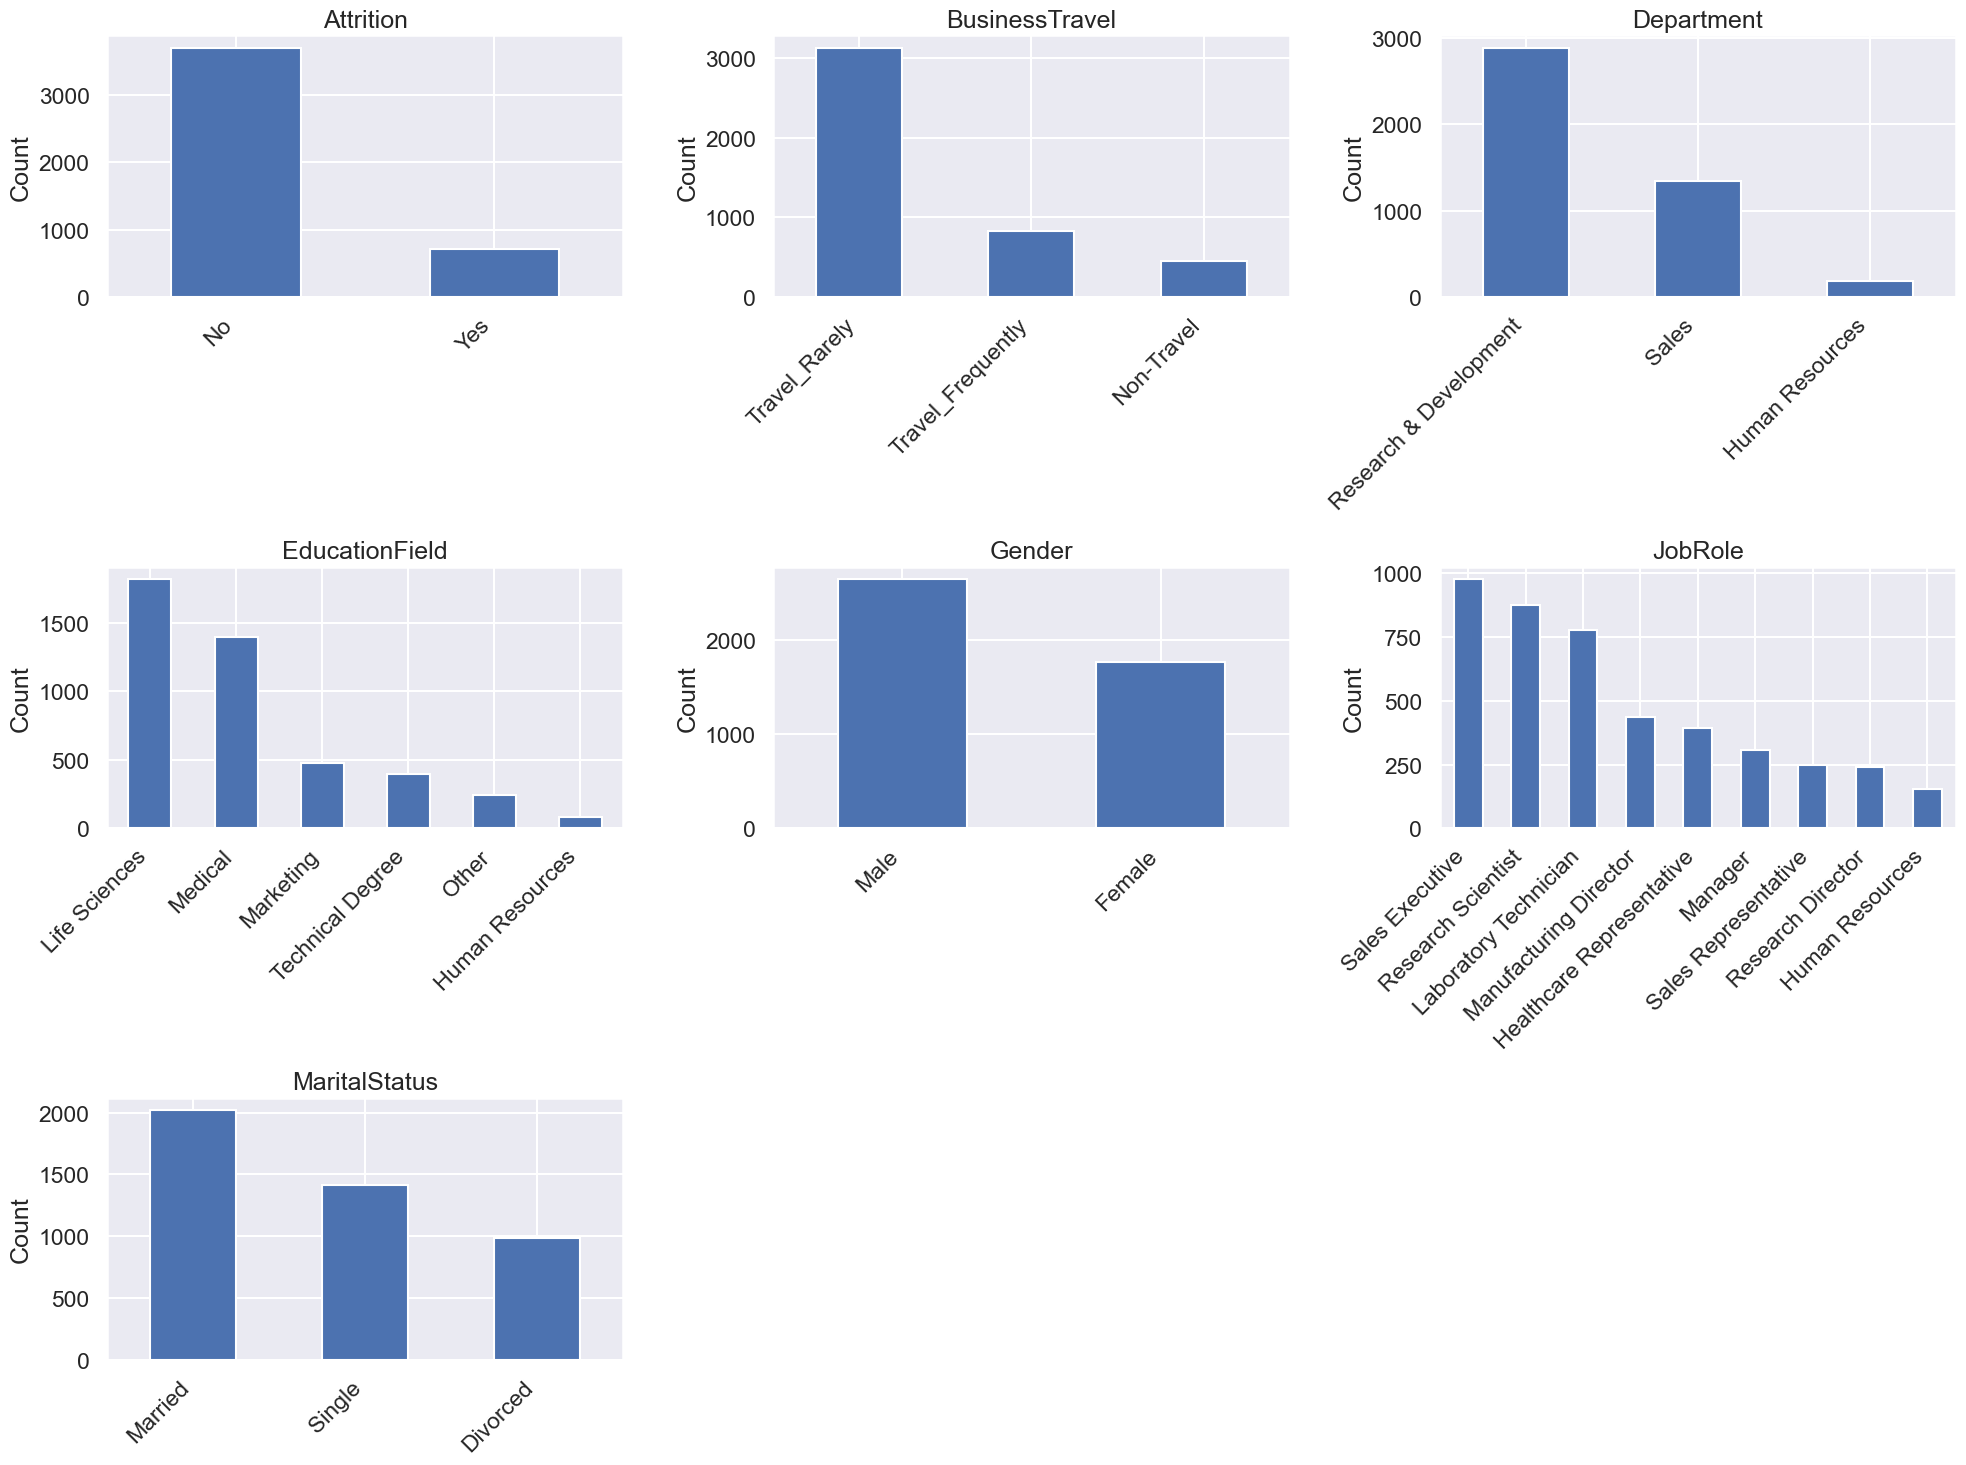

In [24]:
import math

numerical_features = all_data.select_dtypes(exclude=['object'])
numerical_features.hist(bins=50, figsize=(20, 20))
plt.show()

categorical_features = all_data.select_dtypes(include=['object'])
n_cols = 3                     # number of plots per row
n_rows = math.ceil(len(categorical_features.columns) / n_cols)

plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(categorical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    categorical_features[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Plot histograms for each numeric feature to inspect distributions

### Bivariate analysis

- Pair Plot

<Figure size 2000x1200 with 0 Axes>

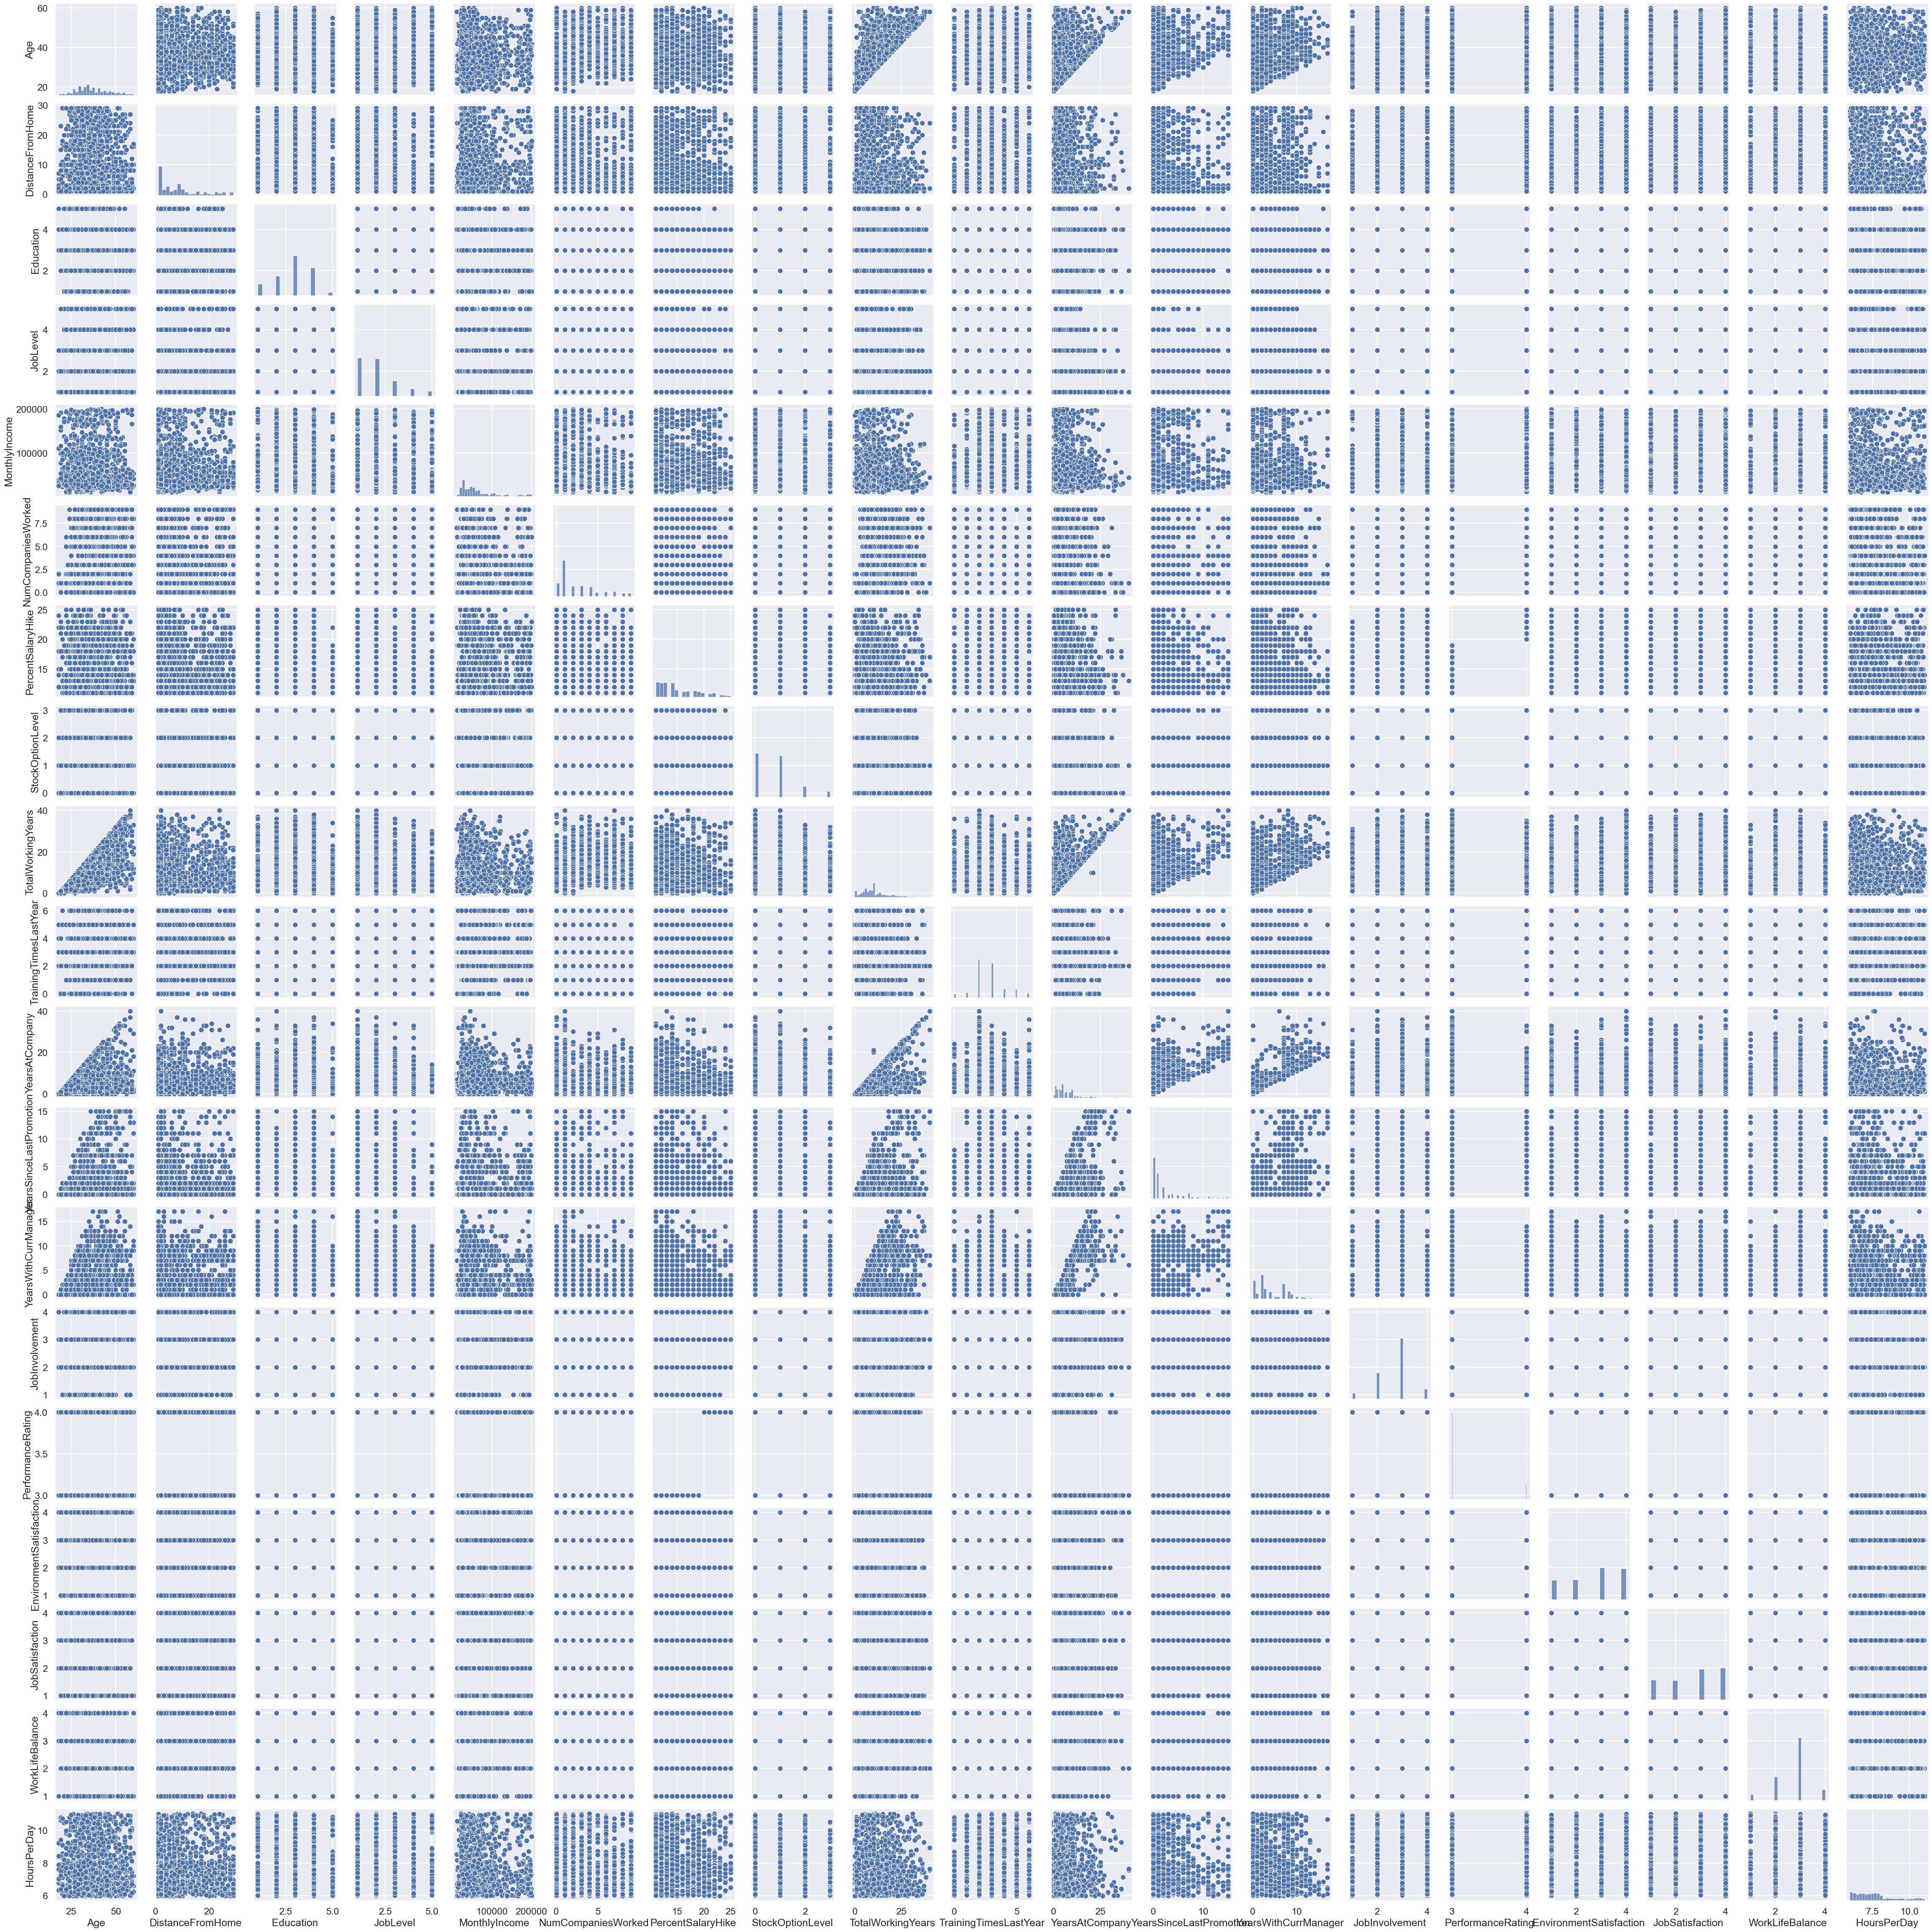

In [25]:
plt.figure(figsize=(20, 12))
sns.pairplot(numerical_features)
plt.show()

### Box plot

Show boxplots for selected numeric features grouped by Attrition to detect group differences that may be useful for modeling.

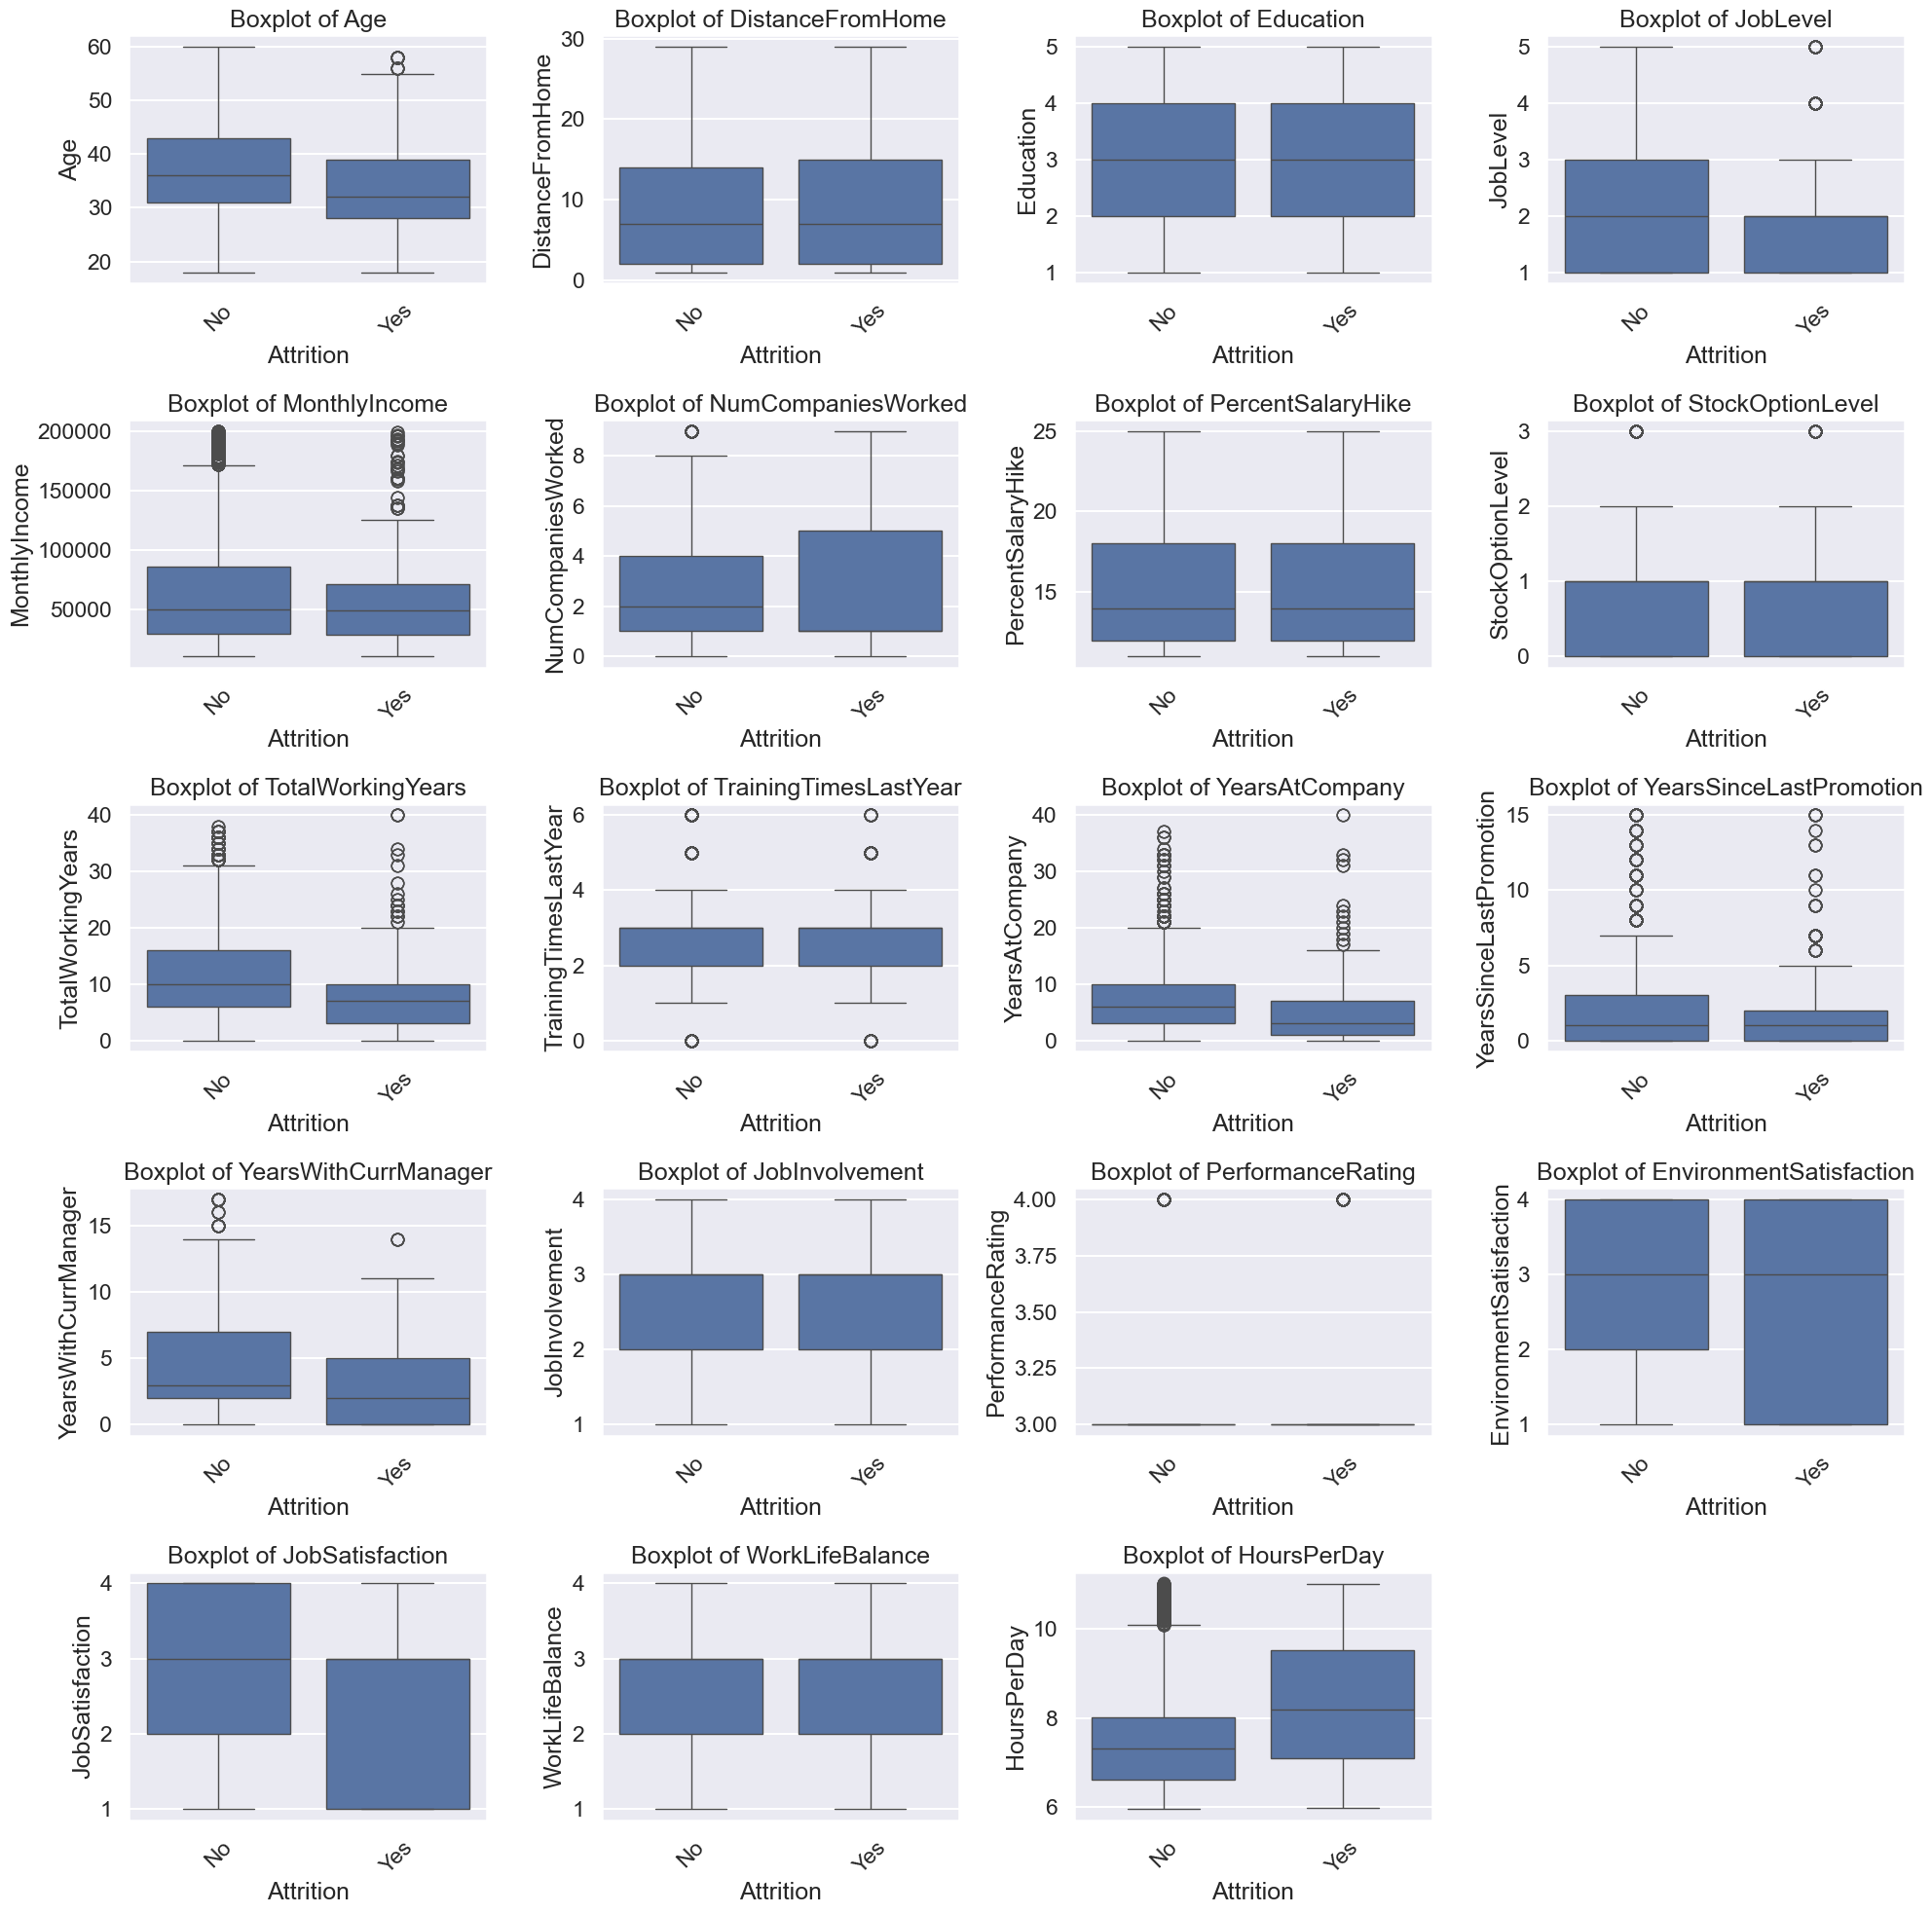

In [26]:
# Create boxplots for select numeric features split by Attrition to visually
# inspect whether the distribution differs between groups

n_cols = 4                     # number of plots per row
n_rows = math.ceil(len(numerical_features.columns) / n_cols)

plt.figure(figsize=(20, 4 * n_rows))

for i, col in enumerate(numerical_features.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=categorical_features["Attrition"], y=numerical_features[col])
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Key observations & explanations
- DistanceFromHome

Medians are similar, but employees who left show slightly higher spread

👉 Distance alone does not strongly explain attrition

- Education

Very similar distributions

👉 Education level has little direct impact on attrition

- JobLevel

Employees who left tend to be at lower job levels. Fewer high-level roles among leavers

👉 Lower hierarchical position increases attrition risk

- MonthlyIncome

Employees who stayed earn more on average. Higher income outliers mostly belong to non-attrition group

👉 Lower income is strongly associated with attrition

- NumCompaniesWorked

Employees who left worked for more companies previously

👉 Job-hopping behavior predicts future turnover

- PercentSalaryHike

Very similar distributions

👉 Salary increase alone does not prevent attrition

- StockOptionLevel

Slightly lower levels among employees who left

👉 Long-term incentives help retention

- TotalWorkingYears

Employees who stayed have more experience. Employees who left are often early-career

👉 Experience stabilizes employment

- TrainingTimesLastYear

Very similar

👉 Training quantity alone does not reduce attrition

- YearsAtCompany

Employees who stayed have higher tenure. Clear difference in medians

👉 Attrition is highest in early years

- YearsSinceLastPromotion

Employees who left waited longer for promotion

👉 Lack of career progression increases attrition

- YearsWithCurrentManager

Employees who stayed worked longer with their manager

👉 Manager relationship stability reduces attrition

- JobInvolvement

Lower involvement for employees who left

👉 Engagement is a key driver of retention

- PerformanceRating

Almost identical

👉 High performers still leave. Attrition is not performance-driven

- EnvironmentSatisfaction

Lower satisfaction among leavers

👉 Work environment strongly impacts attrition

- JobSatisfaction

Clear downward shift for attrition = Yes

👉 One of the strongest predictors. Dissatisfaction drives exits

- WorkLifeBalance

Slightly worse for leavers

👉 Poor balance contributes to attrition

- HoursPerDay

Employees who left work longer hours. Higher median and upper range

👉 Overwork increases attrition risk

### Correlation matrix

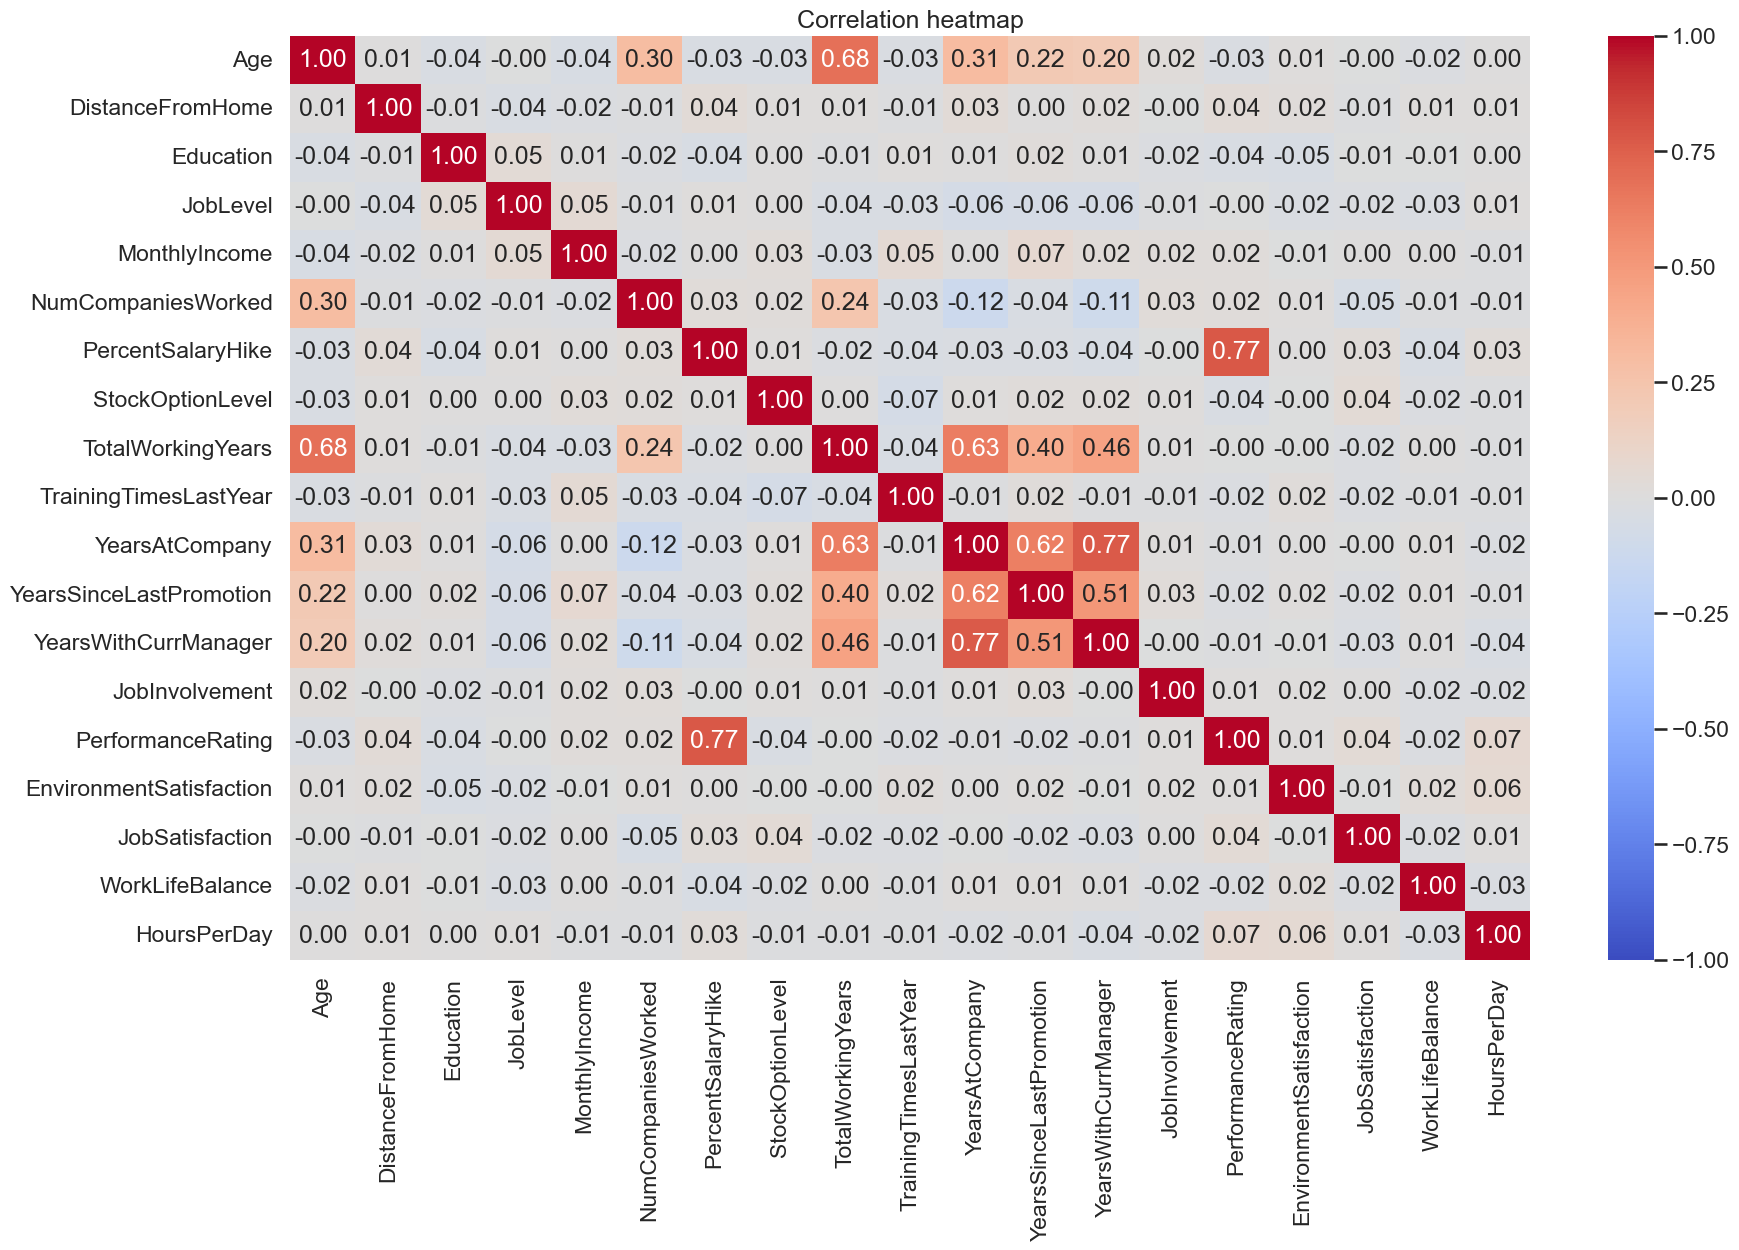

In [27]:

plt.figure(figsize=(20, 12))
sns.heatmap(
    numerical_features.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.title('Correlation heatmap')
plt.show()


Not a huge correlation: the columns don't duplicate each other, so you can keep everything.

One Hot Encoder and Standard Normalisation

In [28]:
encoder = OneHotEncoder()
scaler = StandardScaler()

categorical_features = all_data.select_dtypes(include=['object']).columns.drop(['Attrition'])
numerical_features = all_data.select_dtypes(exclude=['object']).columns
categorical_encoded = pd.DataFrame(encoder.fit_transform(all_data[categorical_features]).toarray(), columns=encoder.get_feature_names_out(categorical_features))
numerical_scaled = pd.DataFrame(scaler.fit_transform(all_data[numerical_features]), columns=numerical_features)

X = pd.concat([categorical_encoded, numerical_scaled], axis=1)
y = all_data['Attrition']
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BusinessTravel_Non-Travel          4410 non-null   float64
 1   BusinessTravel_Travel_Frequently   4410 non-null   float64
 2   BusinessTravel_Travel_Rarely       4410 non-null   float64
 3   Department_Human Resources         4410 non-null   float64
 4   Department_Research & Development  4410 non-null   float64
 5   Department_Sales                   4410 non-null   float64
 6   EducationField_Human Resources     4410 non-null   float64
 7   EducationField_Life Sciences       4410 non-null   float64
 8   EducationField_Marketing           4410 non-null   float64
 9   EducationField_Medical             4410 non-null   float64
 10  EducationField_Other               4410 non-null   float64
 11  EducationField_Technical Degree    4410 non-null   float

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                       0.00                              0.00   
1                       0.00                              1.00   
2                       0.00                              1.00   
3                       1.00                              0.00   
4                       0.00                              0.00   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                          1.00                        0.00   
1                          0.00                        0.00   
2                          0.00                        0.00   
3                          0.00                        0.00   
4                          1.00                        0.00   

   Department_Research & Development  Department_Sales  \
0                               0.00              1.00   
1                               1.00              0.00   
2                               1.00              0.00   
3                               1.00              0.00   
4                               1.00              0.00   

   EducationField_Human Resources  EducationField_Life Sciences  \
0                            0.00                          1.00   
1                            0.00                          1.00   
2                            0.00                          0.00   
3                            0.00                          1.00   
4                            0.00                          0.00   

   EducationField_Marketing  EducationField_Medical  EducationField_Other  \
0                      0.00                    0.00                  0.00   
1                      0.00                    0.00                  0.00   
2                      0.00                    0.00                  1.00   
3                      0.00                    0.00                  0.00   
4                      0.00                    1.00                  0.00   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                             0.00           1.00         0.00   
1                             0.00           1.00         0.00   
2                             0.00           0.00         1.00   
3                             0.00           0.00         1.00   
4                             0.00           0.00         1.00   

   JobRole_Healthcare Representative  JobRole_Human Resources  \
0                               1.00                     0.00   
1                               0.00                     0.00   
2                               0.00                     0.00   
3                               0.00                     1.00   
4                               0.00                     0.00   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                           0.00             0.00   
1                           0.00             0.00   
2                           0.00             0.00   
3                           0.00             0.00   
4                           0.00             0.00   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                            0.00                       0.00   
1                            0.00                       0.00   
2                            0.00                       0.00   
3                            0.00                       0.00   
4                            0.00                       0.00   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                        0.00                     0.00   
1                        1.00                     0.00   
2                        0.00                     1.00   
3                        0.00                     0.00   
4                        0.00                     1.00   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                          0.00                    0.00   
1                          0.00                    0.

Division of the dataset into training/test data and labels

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_test = y_test.replace({'Yes': 1, 'No': 0})

C:\Users\ACER NITRO GAMING\AppData\Local\Temp\ipykernel_4516\415093492.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Yes': 1, 'No': 0})
C:\Users\ACER NITRO GAMING\AppData\Local\Temp\ipykernel_4516\415093492.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Yes': 1, 'No': 0})


## Choice of models to be tested

We have chosen to test different models of classification, in particular :

- Perceptron
- Logistic regression
- Support Vector Machine (SVM)
- K-Nearest Neighbors (KNN)
- Gaussian Naive Bayes
- Decision Tree
- Random Forest

We have chosen these models because of their diversity in terms of complexity, interpretability and performance on different types of data, which will allow us to evaluate a wide range of approaches for our classification task.

In [30]:
models = {
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_test = y_test.replace({'Yes': 1, 'No': 0})

predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

C:\Users\ACER NITRO GAMING\AppData\Local\Temp\ipykernel_4516\3743695315.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'Yes': 1, 'No': 0})
C:\Users\ACER NITRO GAMING\AppData\Local\Temp\ipykernel_4516\3743695315.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'Yes': 1, 'No': 0})


In [31]:

def display_metrics(y_test, y_pred, model_name):
      print("Modèle :", model_name)
      print("Matrice of Confusion :\n", confusion_matrix(y_test, y_pred))
      print("Rapport of Classification :\n", classification_report(y_test, y_pred))

for name, y_pred in predictions.items():
    display_metrics(y_test, y_pred, name)
    print("\n")

Modèle : Perceptron
Matrice of Confusion :
 [[708  33]
 [128  13]]
Rapport of Classification :
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       741
           1       0.28      0.09      0.14       141

    accuracy                           0.82       882
   macro avg       0.56      0.52      0.52       882
weighted avg       0.76      0.82      0.78       882



Modèle : LogisticRegression
Matrice of Confusion :
 [[715  26]
 [107  34]]
Rapport of Classification :
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       741
           1       0.57      0.24      0.34       141

    accuracy                           0.85       882
   macro avg       0.72      0.60      0.63       882
weighted avg       0.82      0.85      0.82       882



Modèle : SVM
Matrice of Confusion :
 [[737   4]
 [ 57  84]]


Rapport of Classification :
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       741
           1       0.95      0.60      0.73       141

    accuracy                           0.93       882
   macro avg       0.94      0.80      0.85       882
weighted avg       0.93      0.93      0.92       882



Modèle : KNN
Matrice of Confusion :
 [[686  55]
 [ 95  46]]
Rapport of Classification :
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       741
           1       0.46      0.33      0.38       141

    accuracy                           0.83       882
   macro avg       0.67      0.63      0.64       882
weighted avg       0.81      0.83      0.82       882



Modèle : NaiveBayes
Matrice of Confusion :
 [[640 101]
 [ 84  57]]
Rapport of Classification :
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       741
           1       

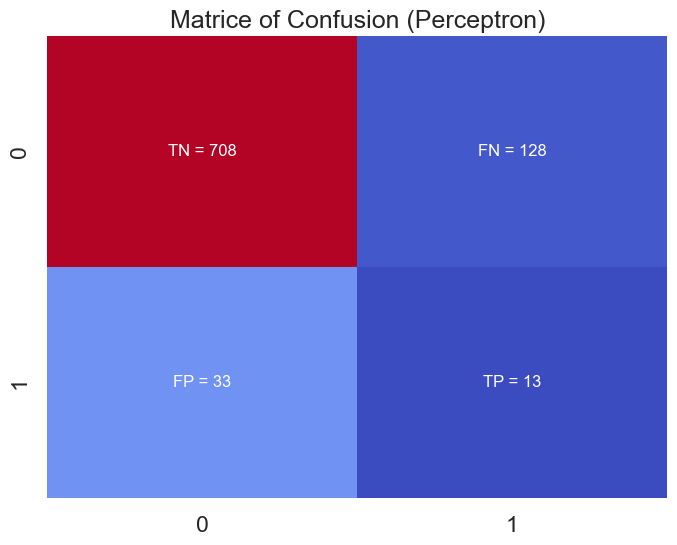

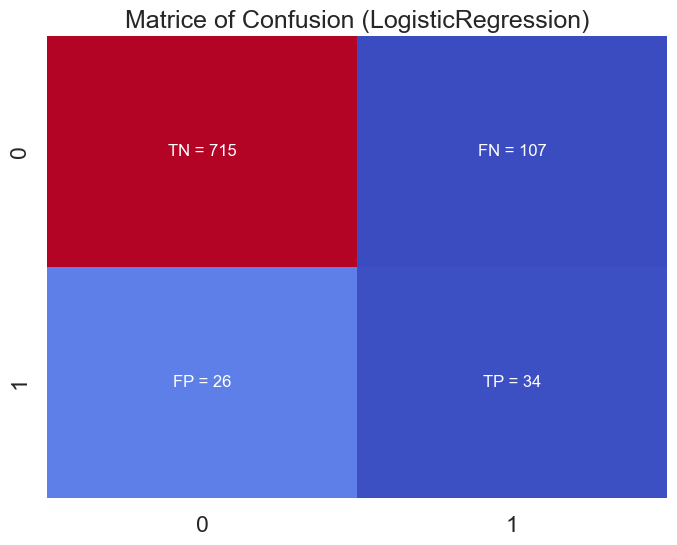

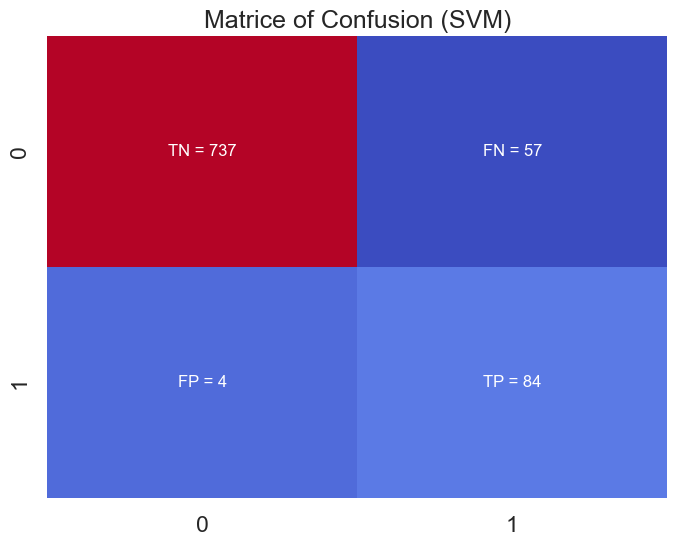

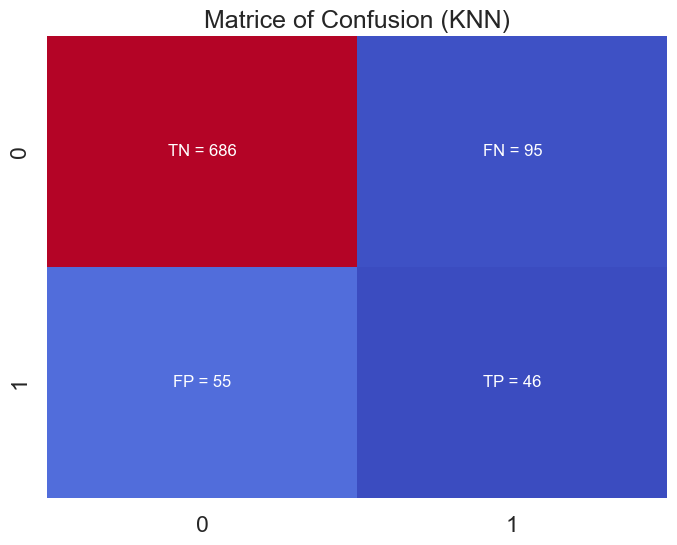

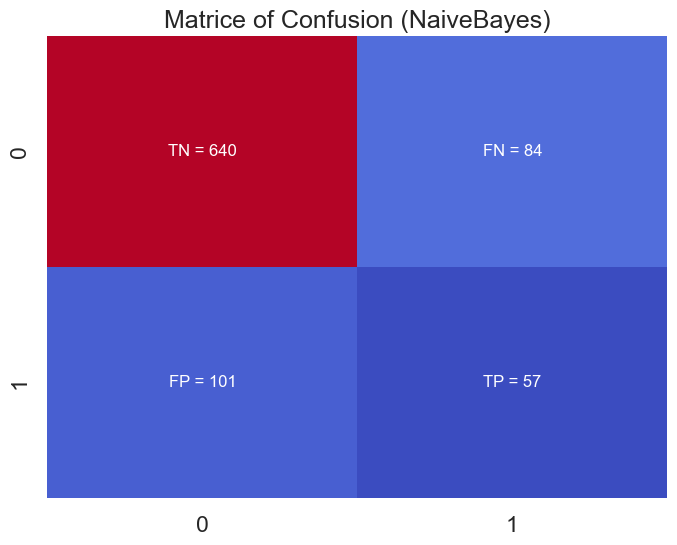

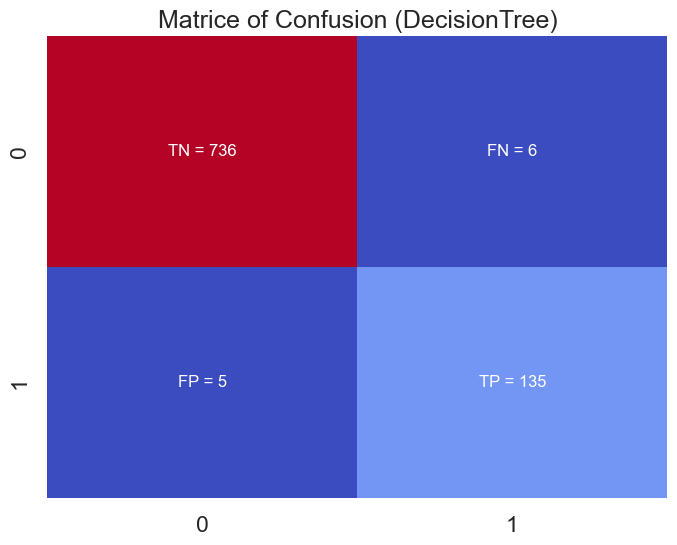

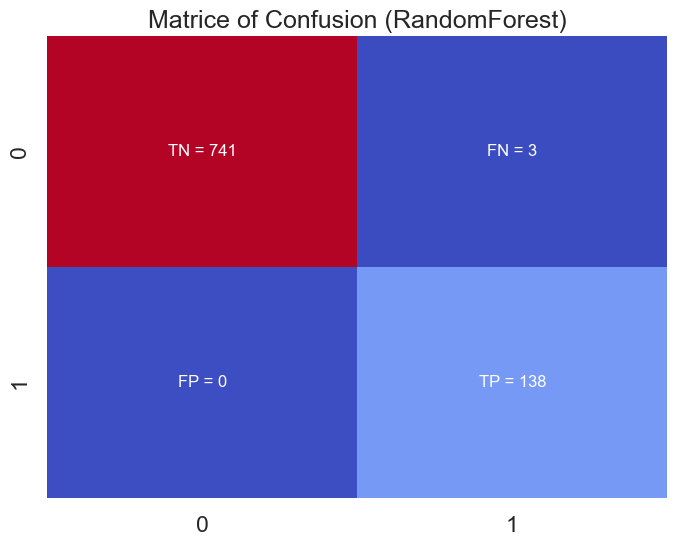

In [32]:
for name, y_pred in predictions.items():
      conf_matrix = confusion_matrix(y_test, y_pred)
      plt.figure(figsize=(8, 6))
      sns.heatmap(conf_matrix, annot=False, fmt="d", cmap="coolwarm", cbar=False)
      TN, FP, FN, TP = conf_matrix.ravel()

      plt.text(0.5, 0.5, f'TN = {TN}', ha='center', va='center', color='white', fontsize=12)
      plt.text(0.5, 1.5, f'FP = {FP}', ha='center', va='center', color='white', fontsize=12)
      plt.text(1.5, 0.5, f'FN = {FN}', ha='center', va='center', color='white', fontsize=12)
      plt.text(1.5, 1.5, f'TP = {TP}', ha='center', va='center', color='white', fontsize=12)
      plt.title(f"Matrice of Confusion ({name})")
      plt.show()

### Roc curve

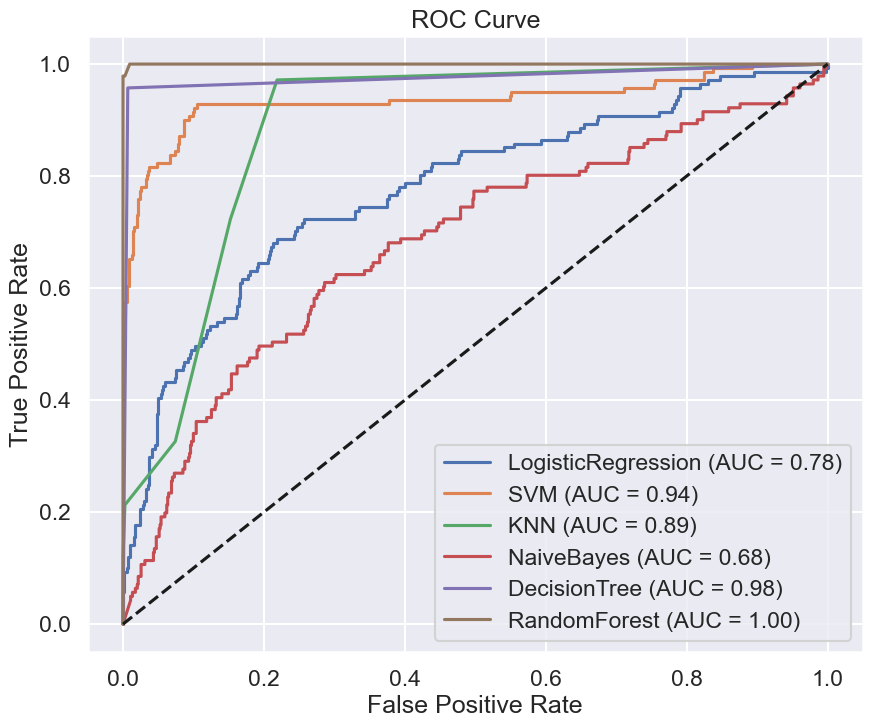

                Model          Precision             Recall  \
0          Perceptron  0.282608695652174  0.092198581560284   
1  LogisticRegression  0.566666666666667  0.241134751773050   
2                 SVM  0.954545454545455  0.595744680851064   
3                 KNN  0.455445544554455  0.326241134751773   
4          NaiveBayes  0.360759493670886  0.404255319148936   
5        DecisionTree  0.964285714285714  0.957446808510638   
6        RandomForest  1.000000000000000  0.978723404255319   

            F1 Score                AUC  
0  0.139037433155080               None  
1  0.338308457711443  0.776485676821623  
2  0.733624454148472  0.936256352829701  
3  0.380165289256198  0.887142159818532  
4  0.381270903010033  0.681090341784631  
5  0.960854092526690  0.975349585092026  
6  0.989247311827957  0.999870789904385  


In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

scores = []

for name, y_pred in predictions.items():
    y_proba = models[name].predict_proba(X_test)[:, 1] if hasattr(models[name], "predict_proba") else None
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    scores.append({
        'Model': name,
        'Precision': f"{precision_score(y_test, y_pred):.15f}",
        'Recall': f"{recall_score(y_test, y_pred):.15f}",
        'F1 Score': f"{f1_score(y_test, y_pred):.15f}",
        'AUC': f"{auc_score:.15f}" if auc_score is not None else None
    })

scores_df = pd.DataFrame(scores)
print(scores_df)


## Results Analysis

- Random Forest stands out as the best performing model with an AUC of 1.00 and good precision at all recall levels.
- Decision Tree and SVM follow closely behind with AUCs of 0.96 and 0.92, indicating solid performance.
- KNN show good performance, with AUC of 0.88.
- Logistic Regression show acceptable performance, with AUC of 0.76.
- Naive Bayes is the worst performer with an AUC of 0.67, showing low precision and recall.


### Random forest Cross validation

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models["RandomForest"], X_train, y_train, cv=5, scoring='f1')
print("RandomForest")
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Score: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")
print(f"Min Score: {scores.min():.4f}, Max Score: {scores.max():.4f}")


RandomForest
Cross-Validation Scores: [0.91 0.9  0.94 0.94 0.94]
Mean Score: 0.9268
Standard Deviation: 0.0185
Min Score: 0.9005, Max Score: 0.9444


### Feature importances

C:\Users\ACER NITRO GAMING\AppData\Local\Temp\ipykernel_4516\89143841.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importances_rf_df.reset_index(), y="index", x="Importance", palette="viridis")


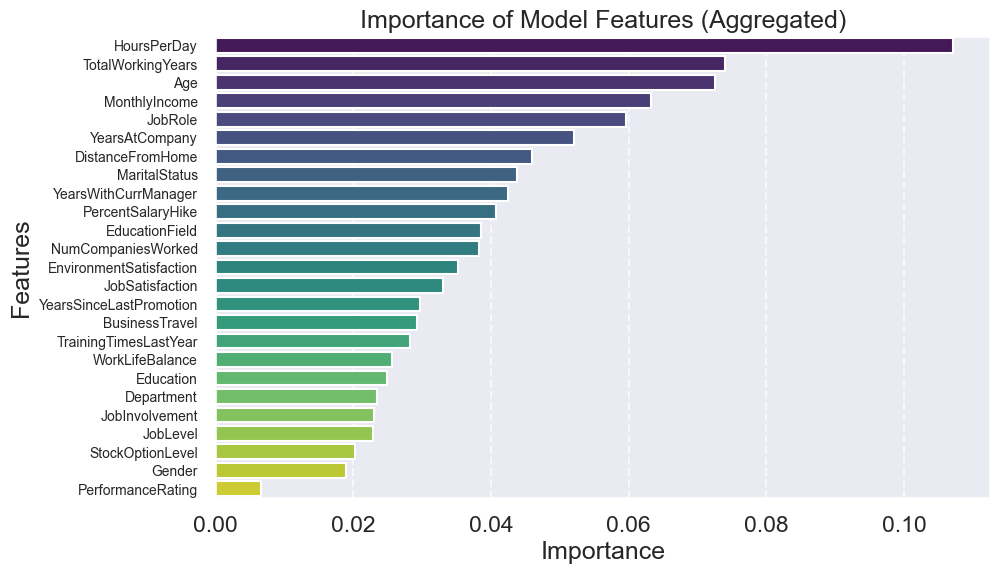

In [35]:
importances_rf = models['RandomForest'].feature_importances_
features = X.columns
grouped_importances = {}

for feature, importance in zip(features, importances_rf):
    original_feature = feature.split("_")[0]

    if original_feature in grouped_importances:
        grouped_importances[original_feature] += importance
    else:
        grouped_importances[original_feature] = importance

feat_importances_rf_df = pd.DataFrame.from_dict(grouped_importances, orient="index", columns=["Importance"])
feat_importances_rf_df = feat_importances_rf_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importances_rf_df.reset_index(), y="index", x="Importance", palette="viridis")

plt.xlabel("Importance")
plt.ylabel("Features")
plt.yticks(fontsize=10)
plt.title("Importance of Model Features (Aggregated)")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


In [36]:
indices = np.argsort(importances_rf)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(10):
    print(f"{f + 1}. Feature {X.columns[indices[f]]} ({importances_rf[indices[f]]})")

# 1. Get the names of the top features (e.g., top 5)
top_n = 5
top_indices = indices[:top_n]
top_features = [X.columns[i] for i in top_indices]
print("=================================")
# 2. Compare group means in the original dataset (for readability)
# Ensure your DataFrame has 'Attrition' encoded as 0 (Stay) and 1 (Leave)
print("Comparison of group means (0=Stay, 1=Leave):")
print(all_data.groupby('Attrition')[top_features].mean())

Feature ranking:
1. Feature HoursPerDay (0.10712736036028504)
2. Feature TotalWorkingYears (0.0739223128534707)
3. Feature Age (0.07257808068458793)
4. Feature MonthlyIncome (0.06326027430227847)
5. Feature YearsAtCompany (0.052056711317335996)
6. Feature DistanceFromHome (0.04597309813813986)
7. Feature YearsWithCurrManager (0.04247200340965035)
8. Feature PercentSalaryHike (0.0406796073994025)
9. Feature NumCompaniesWorked (0.03825343218040609)
10. Feature EnvironmentSatisfaction (0.03525200835275335)
Comparison of group means (0=Stay, 1=Leave):
           HoursPerDay  TotalWorkingYears   Age  MonthlyIncome  YearsAtCompany
Attrition                                                                     
No                7.58              11.86 37.56       65672.60            7.37
Yes               8.32               8.26 33.61       61682.62            5.13


## Key Results based on the feature importances graph

### **Most influential factors**

1. **HoursPerDay** – Long working hours are the strongest predictor of attrition (burnout).
2. **TotalWorkingYears** – Less experienced employees are more likely to leave.
3. **MonthlyIncome** – Lower pay significantly increases turnover risk.
4. **JobRole** – Some roles have structurally higher attrition.
5. **YearsAtCompany** – Employees are most likely to leave in their early years.

### **Secondary factors**

* Distance from home
* Stability with current manager
* Salary hikes
* Job and environment satisfaction
* Past job-hopping behavior

### **Low-impact factors**

* Performance rating
* Education level
* Training quantity
* Department and job level

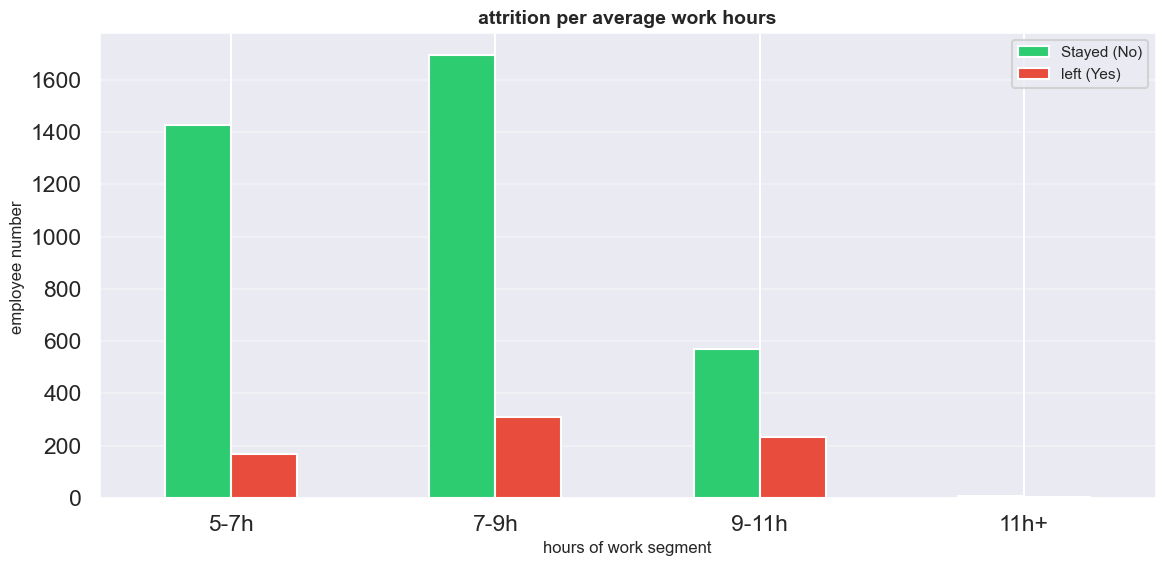

Distribution d'attrition par segment d'heures :
Attrition       No  Yes
HoursSegment           
5-7h          1426  167
7-9h          1696  308
9-11h          568  233
11h+             9    3

percentage attrition per segment :
HoursSegment
5-7h    10.48
7-9h    15.37
9-11h   29.09
11h+    25.00
dtype: float64


In [37]:
# Créer des segments d'heures de travail
bins = [0, 5, 7, 9, 11, 13]
labels = ['0-5h', '5-7h', '7-9h', '9-11h', '11h+']

# Créer une colonne avec les segments
all_data['HoursSegment'] = pd.cut(all_data['HoursPerDay'], bins=bins, labels=labels, right=False)

# Compter attrition par segment
attrition_by_segment = pd.crosstab(all_data['HoursSegment'], all_data['Attrition'])

# Visualiser avec un graphique
fig, ax = plt.subplots(figsize=(12, 6))
attrition_by_segment.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
plt.title('attrition per average work hours', fontsize=14, fontweight='bold')
plt.xlabel('hours of work segment', fontsize=12)
plt.ylabel('employee number ', fontsize=12)
plt.legend(['Stayed (No)', 'left (Yes)'], fontsize=11)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Afficher les statistiques
print("Distribution d'attrition par segment d'heures :")
print(attrition_by_segment)
print("\npercentage attrition per segment :")
attrition_pct = (attrition_by_segment['Yes'] / attrition_by_segment.sum(axis=1) * 100).round(2)
print(attrition_pct)

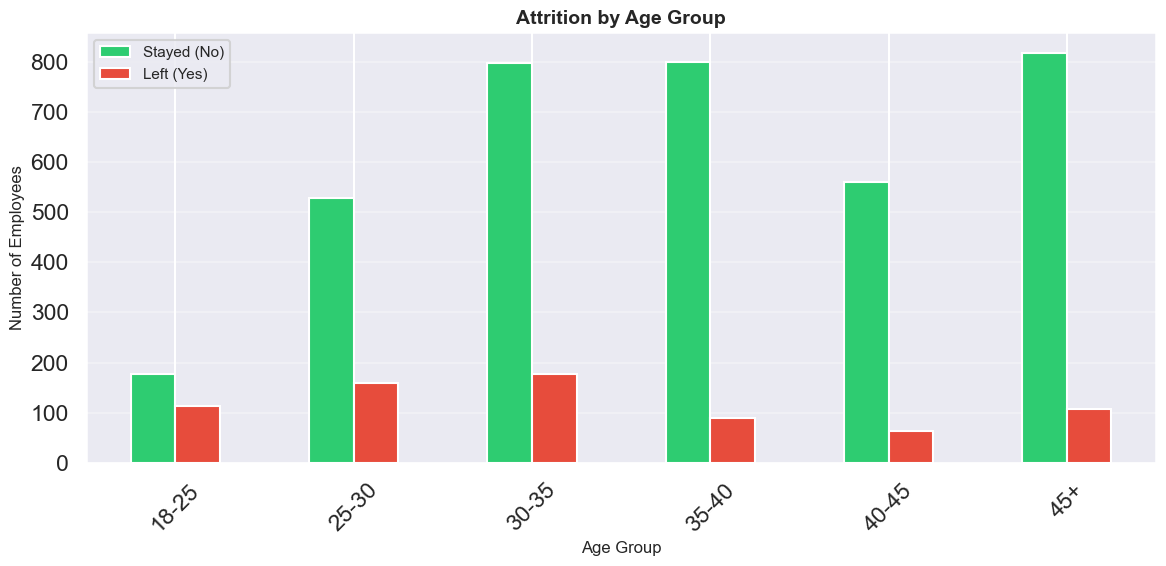

Distribution of attrition by age group:
Attrition    No  Yes
AgeSegment          
18-25       177  114
25-30       528  159
30-35       798  177
35-40       801   90
40-45       561   63
45+         819  108

Percentage of attrition per age group:
AgeSegment
18-25   39.18
25-30   23.14
30-35   18.15
35-40   10.10
40-45   10.10
45+     11.65
dtype: float64


In [38]:
# Age segmentation analysis
bins_age = [0, 25, 30, 35, 40, 45, 60]
labels_age = ['18-25', '25-30', '30-35', '35-40', '40-45', '45+']

# Create a column with age segments
all_data['AgeSegment'] = pd.cut(all_data['Age'], bins=bins_age, labels=labels_age, right=False)

# Count attrition by age segment
attrition_by_age = pd.crosstab(all_data['AgeSegment'], all_data['Attrition'])

# Visualize with a bar chart
fig, ax = plt.subplots(figsize=(12, 6))
attrition_by_age.plot(kind='bar', ax=ax, color=['#2ecc71', '#e74c3c'])
plt.title('Attrition by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(['Stayed (No)', 'Left (Yes)'], fontsize=11)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display statistics
print("Distribution of attrition by age group:")
print(attrition_by_age)
print("\nPercentage of attrition per age group:")
attrition_pct_age = (attrition_by_age['Yes'] / attrition_by_age.sum(axis=1) * 100).round(2)
print(attrition_pct_age)

## Segmentation Analysis Summary

**Working Hours:** Attrition increases dramatically with longer work hours. Excessive workload (9+ hours) drives turnover significantly.

**Experience:** Early-career employees (0-5 years) show the highest attrition. Retention improves substantially with experience, becoming minimal after 15 years.

**Income:** Lower-paid employees (10k-30k) have significantly higher attrition. Compensation directly impacts retention, with attrition dropping sharply above 90k.

**Conclusion:** Attrition is driven by **workload, career stage, and compensation**—all controllable factors that require immediate organizational attention.

## Answer to Management’s Question

> **Employee turnover is mainly caused by overwork, low compensation, early-career instability, and role-specific pressure — not by employee performance.**


## Key Recommendations

* Reduce excessive working hours and prevent burnout
* Focus retention efforts on early-career employees
* Adjust compensation for high-risk roles
* Improve role design and managerial stability